In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle_superstore as w
from datetime import date
import viz
from matplotlib import style
style.use('ggplot')

# PROJECT OVERVIEW

The goal of this project is to analyze sales from superstore db and present information to the VP of Products to guide the decision making process. Data contains transactions from 2014-2017 with multiple categories, sub categories, and brands.

**Primary Question: which product line to expand?**

Due to limited data we focused mostly on which sub-category to expand and included some additional information on brands within that sub-category.

***

# Acquiring Data

Data is stored in codeup's SQL database and accessed through a python library called `pandas`. The query is written in `MySQL` and is contained in `wrangle_superstore.py` module. This module pulls the data, does some cleaning, preparation, and feature engineering and returns a pandas dataframe.

***

# Preparing Data

As mentioned above, the prep is done in `wrangle_superstore.py`. The data is cleaned and prepared for analysis. 
The following steps are performed:
1. change column names to lowercase
2. replace spaces and - with underscores
3. drop redundant columns ("customer_name", "region_id", "category_id", "country", "product_id"])
4. convert "order_date" and "ship_date" to datetime objects
5. convert postal code to object
6. convert index to order_date
7. sort index
8. add columns for "unit cost", "unit profit", "brand", "product line"
9. round dollar amounts to 2 decimal places

In [2]:
df = w.wrangle_superstore() # this acquires and preps the data
df.head(3)

Using cached csv


,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,sales,...,discount,profit,category,sub_category,product_name,region_name,unit_cost,unit_profit,brand,product_line
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,11.78,...,0.2,4.27,Office Supplies,Labels,Avery 508,Central,4.91,1.4239,Avery,Avery_Labels
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,3.54,...,0.8,-5.49,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Central,8.85,-2.7435,GBC,GBC_Binders
2014-01-04,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,Naperville,Illinois,60540,272.74,...,0.2,-64.77,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Central,113.64,-21.5916,SAFCO,SAFCO_Storage


### Spliting is not done in this project. Due to lack of modeling and data.
***

## Exploratory Data Analysis

Here will answer a few basic questions about the data and determine which product line to expand.

### Q1. Is there a product category that is particularly profitable for us? 

In [3]:
# show profit by category
df.groupby('category').profit.sum().sort_values(ascending=False).head(10)

category
Office Supplies    19312.29
Technology         19251.38
Furniture           -623.15
Name: profit, dtype: float64

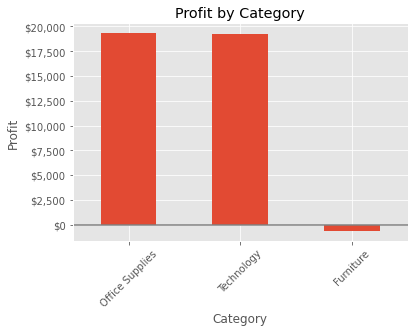

In [4]:
viz.graph_profit_by_category(df)

### Q2: Does one or another stand out in terms of sales volume?

In [5]:
# show quantity by category
df.groupby('category').quantity.sum().sort_values(ascending=False).head(10)

category
Office Supplies    3974.0
Furniture          1401.0
Technology         1205.0
Name: quantity, dtype: float64

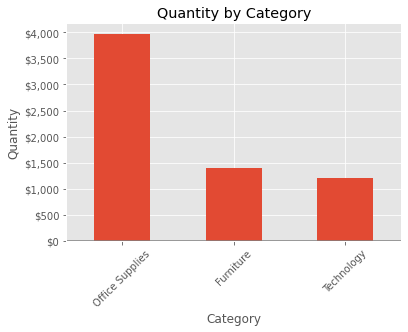

In [6]:
viz.graph_quantity_by_category(df)

Q3: Does this vary by customer segment?

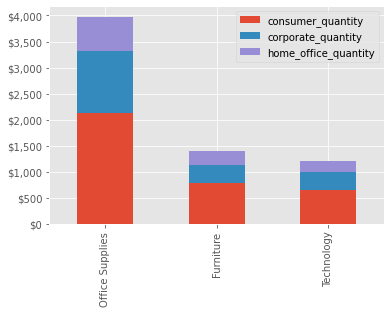

In [7]:
viz.graph_quantity_by_category_segment(df)

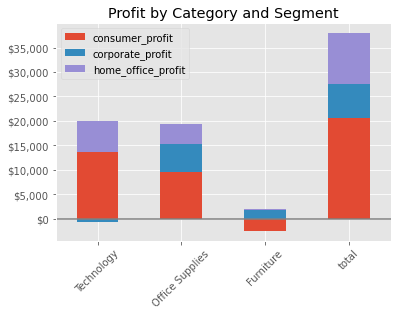

In [8]:
viz.graph_profit_by_category_segment(df)

### Final Question: Which product line to expand?
We can look at all the profits over time and then hone in on the best sub catergory to expand.

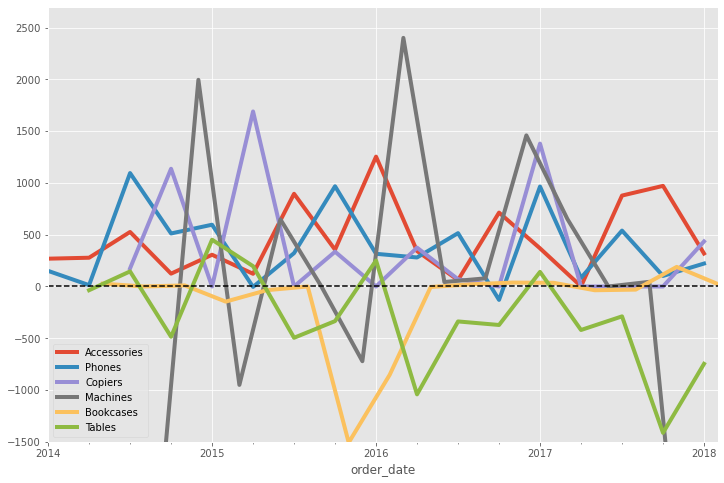

In [9]:
viz.graph_top_and_bottom_sub_categories(df)

/Users/brandynwaterman/codeup-data-science/time-series-project/viz.py:162: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


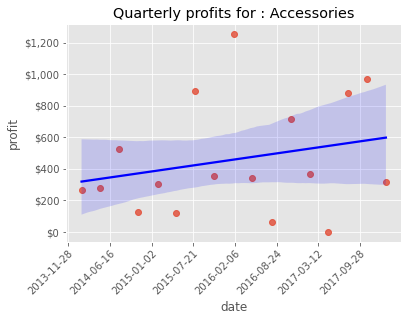

In [10]:
viz.graph_quarterly_profit(df, "Accessories")

### Additional information for expansion: What is the breakdown of the Accesories category by brand? 

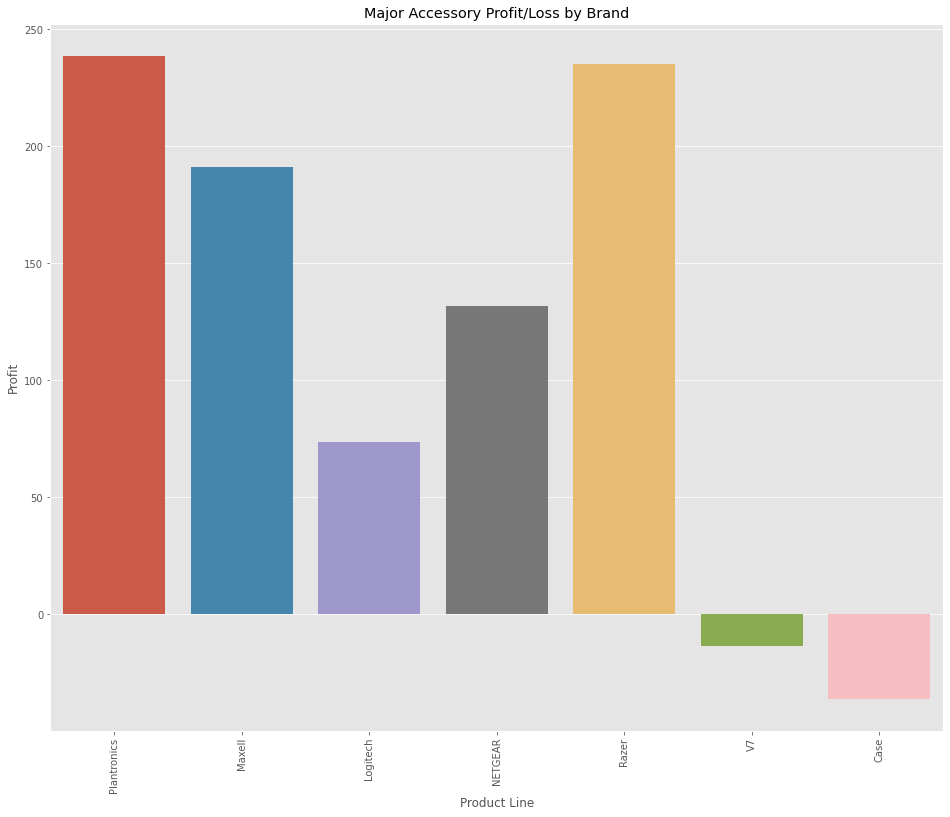

In [12]:
# Showing the top brands by Accessories for average loss or profit/transaction
viz.avg_acc_brands(df)

### Breakdown by product name for Accessories:
Using specific product words to analyze the dataframe the most profitable and frequent products were determined for accessories. The top performing products are headsets, keyboards, mice, and storage (memory). With 26%, 17%, 15.5%, and 9% of the category's sales respectively.

Of these products the three brands that were the most relevant are Logitech, Plantronic, and Razer with Logitech leading in sales volume for Keyboards and Mice. 

To see the code and analysis that determined these metrics please see the explore notebooks provided.

### Summarize explore data:
Our initial exploration demonstrated that the company's highest profit came from their accessories sub-category of products, and that they had some sub-category's where they have losses. One example of a major loss product is their offerings for tables. 

With a deeper look at the accessories category a breakdown by brand and product reveals that the most opportunity lies with reinforcing the sale of products from Logitech, Plantronic, and Razer. If at all possible, the company should expand and focus on accessories like Headsets, Keyboards, and Mice as these showed the best profit margins and had relatively decent sales volumes as well.

In Summary:
- The sub-category most likely to show a positive outcome from expansion is Accessories. This is demonstrated by the trend of profit over time as well as current share of company profit origin. 
- The brands that should be emphasized for increased product acquisition should be Logitech, Plantronic, and Razer for computer and gaming accessories, with Logitech being the leading sales volume of Keyboards and Mice for the superstore. 
- Headsets has a somewhat lower volume than other gaming accessories with the highest share of profit and should be the priority for expansion if opportunity allows.

## Conclusion:
Our analysis found that the most opportunity for product expansion would be within the Accessories sub-category, and more specifically the computer and gaming products within this category. For these products the most profitable companies were Logitech, Plantronic, and Razer with the most profitable product being headsets. 

Additionally, the use of heavy discounts on products where the company is showing losses, such as for tables, demonstrates space where the company can re-allocate resources if need be to put towards the expansion of their profitable product lines. 

Unfortunately the data is limited in its capacity to assist with predictions or time projections due to a small amount of datapoints across the several year period. For this reason our analysis has largely focused on profit and volume metrics. 

## Recommendations:
Moving forward the company should continue to work on gathering data about the products they sell, and provide more internal categorization of certain products that appear to be loss leaders. If there was more time to work with the data a deeper dive on discounts could help reveal where losses could be mitigated if there is a possibility of predicting the same sales volume with a lower discount. 

As for product expansion we believe the company's best course of action is to expand their computer and gaming products under accessories, and to try and emphasize their Logitech, Plantronic, and Razer product lines because they have both a higher yield of profits and a reliable sales volume. 